In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import cv2
import util
import palm_subtraction as PS

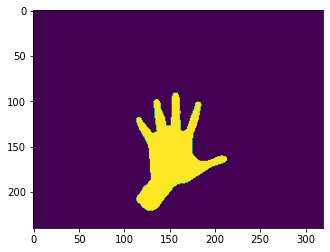

In [72]:
file = "data/acquisitions/S2/G1/2-color.png"
# file = "data/acquisitions/S1/G8/26-color.png"
# file = 'data/acquisitions/S4/G5/22-color.png'
# file = r'.\data\acquisitions\S1\G1\23-color.png'
# file = r'.\data\acquisitions\S1\G1\24-color.png'
label = '5'
train_image = cv2.imread(file, cv2.IMREAD_COLOR)

depth_img = util.read_depth_map(file[:-9] + 'depth.bin')

# Clean depth image of noise
bin_img = PS.clean_image(depth_img)
plt.imshow(bin_img)

subtracted wrist


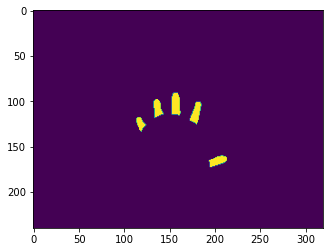

In [73]:
img = PS.palm_subtraction(bin_img)
plt.imshow(img)

In [74]:
# _, lab_im = cv2.connectedComponents(bin_img)
# plt.imshow(lab_im)

# # find areas and subtract it
# max_area = -1
# max_label = -1
# for label in range(1, np.max(np.unique(lab_im))):
# #     rows, cols = np.where(labeled_image == label)
#     area = np.sum((lab_im == label).astype('uint8'))
#     if area > max_area:
#         max_area = area
#         max_label = label
# bin_img = (lab_im == max_label).astype('uint8') * 255
# plt.imshow(bin_img)

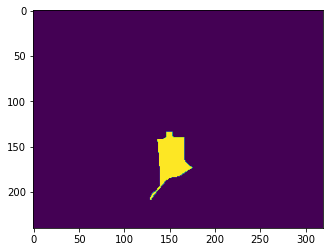

In [75]:
kernel = np.ones((15,20), dtype = 'uint8')
# image_dilate = cv2.dilate(bin_img, kernel)  
image_erode = cv2.erode(bin_img, kernel)  
plt.imshow(image_erode)

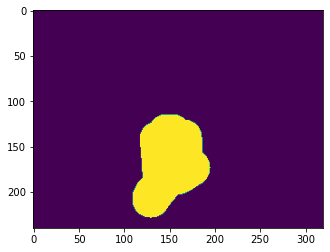

In [76]:
kernel = np.ones((25,25), dtype = 'uint8')
image_blur = gaussian_filter(image_erode, 3)
kernel = np.zeros((40, 40, 3), dtype='uint8')
kernel = cv2.circle(kernel, (20, 20), 20, (255, 255, 255), -1)
image_dilate = cv2.dilate(image_erode, kernel[:,:,1])  
# image_erode = cv2.erode(bin_img, kernel)  
plt.imshow(image_dilate)

# polylines attempt

In [77]:
import p1n2 as hw

def convert2imgcoords(x, y, slope, num_row, scale=9999):
    p1, p2 = (x, num_row - y), (x - scale, int(-scale * (-slope) + num_row - y))
    if p2[0]*p2[1] > 0:
        p1, p2 = (x, num_row - y),(x + scale, int(scale * (-slope) + num_row - y))
    return p1, p2
    
#     return(x, num_row - y), (x - scale, int(-scale * (-slope) + num_row - y))
#     return(x, num_row - y),(x + scale, int(scale * (-slope) + num_row - y))
        

def wrist_subtraction(palm_img, radius=30, display=False):
    img = palm_img.copy()
    attribute_list = hw.get_attribute(img/255)
    h, w = img.shape
    p1, p2 = convert2imgcoords(int((attribute_list[0]["position"]["x"])),
                           int((attribute_list[0]["position"]["y"])),
                           np.tan(attribute_list[0]["orientation"]), h)
    p1 = (p1[0] + radius, p1[1])
    p3 = (0, p1[1])
    print(p1, p2, p3)
    corners = np.array([np.array(p1), np.array(p2), np.array(p3)])

    return_img = cv2.fillPoly(img,[np.int32(corners)], 255)
    if display is True:        
        display_image = cv2.circle(return_img, p1, 2, 155, 2)
        plt.imshow(display_image)
    
    return return_img

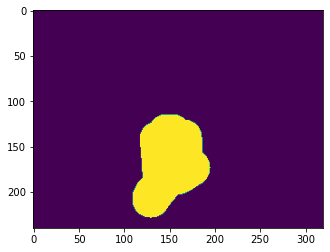

In [78]:
plt.imshow(image_dilate)

(179, 169) (-9850, 29077) (0, 169)


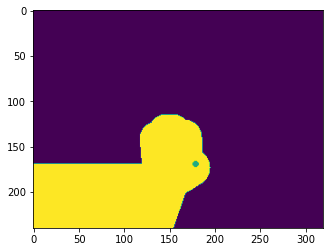

(179, 169) (-9850, 29077) (0, 169)


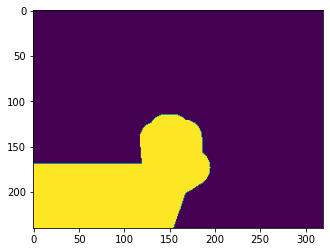

In [79]:
wrist_subtraction(image_dilate, display=True)
plt.show()
plt.imshow(wrist_subtraction(image_dilate, display=False))

(199, 122) (-9830, 18384) (0, 122)


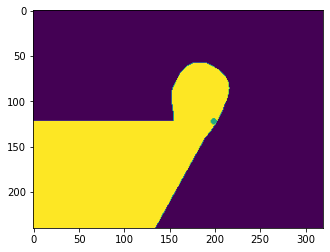

(199, 122) (-9830, 18384) (0, 122)


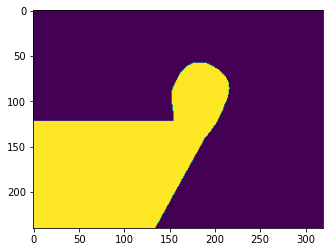

In [63]:
wrist_subtraction(image_dilate, display=True)
plt.show()
plt.imshow(wrist_subtraction(image_dilate, display=False))

In [42]:
p1, p2 = convert2imgcoords(int((attribute_list[0]["position"]["x"])),
                           int((attribute_list[0]["position"]["y"])),
                           np.tan(attribute_list[0]["orientation"]), h)
radius = 30
p1 = (p1[0]+radius, p1[1])
p3 = (0, p1[1])
p4 = (0, p2[1])

corners = np.array([np.array(p1), np.array(p2), np.array(p3)])

test_image = image_dilate.copy()
img3 = cv2.fillPoly(test_image,[np.int32(corners)], 255)
img3 = cv2.circle(img3, p1, 2, 155, 2)
plt.imshow(img3)

NameError: name 'attribute_list' is not defined

In [ ]:
attributed_image = hw.draw_attributes(image_dilate, attribute_list)
plt.imshow(attributed_image)

In [ ]:
# plt.imshow(bin_img - image_dilate)
fingies = bin_img - image_dilate
fingies[fingies != 255] = 0
plt.imshow(fingies)
plt.colorbar()
print(np.unique(fingies))

In [ ]:
_, lab_im = cv2.connectedComponents(fingies)     
plt.imshow(lab_im)
np.unique(lab_im)
print('number of fingers is ',  np.max(lab_im))

In [ ]:
attribute_list = hw.get_attribute(image_dilate/255)
h, w = image_dilate.shape
radius = 30
test_image = image_dilate.copy()
y = np.arange(int(attribute_list[0]['position']['x']), h)
b = attribute_list[0]['position']['y'] - np.tan(attribute_list[0]['orientation'])*attribute_list[0]['position']['x']
m = np.tan(attribute_list[0]['orientation'])

for (yi) in zip(y):
    x_calc = int(attribute_list[0]['position']['y']) + int(np.round((yi - b)/ min(-m, m)))
#     x_calc = int(np.round((yi - b)/ min(-m, m)))
#     print(x_calc + radius)
    test_image[yi, 0 : x_calc + radius] = 255
plt.imshow(test_image)